# Ice Cream Parlor

class IceCreamOrder
---

In [ ]:
import random
from sys import displayhook
import time
from PIL import Image

class IceCreamOrder:
#Constructor
    def __init__(self):
        #The order number
        self.orderNum = 1
        #The number of scoops in the order, which can be 1, 2, or 3 scoops
        #Defaulting as 1, but will randomly generated for each order
        self.scoops = 1
        
        #Options at the Ice Cream Parlor
        self.listOfFlavors = ["Vanilla", "Chocolate", "Strawberry"]
        self.listOfToppings = ["Sprinkles", "Chocolate Chips", "Cherry", "No Topping"]
        self.listOfConesAndCup = ["Waffle Cone", "Cake Cone", "Cup"]
        
        #Default Order
        self.orderFlavors = [None]*3
        self.orderToppings = [None]*3
        self.orderContainer = ""
        
        #Images of Ice Cream Scoops
        self.scoopImages = [None]*3
        
        #Image of Ice Cream Final
        self.iceCream = None
        
#Method: Get the randomly generated ice cream order
    def takeOrder(self):
        #Get the number of scoops
        self.scoops = random.randrange(1,4)
        #Get what the ice cream is put in
        self.orderContainer = random.choice(self.listOfConesAndCup)
        #Get each scoop of ice cream and its topping
        for x in range(3):
            #Will always get at least one scoop of ice cream
            self.orderFlavors[x] = random.choice(self.listOfFlavors)
            self.orderToppings[x] = random.choice(self.listOfToppings)
            #A cherry can only go on the top scoop (when x = 0)
            while x != 0:
                if self.orderToppings[x] == "Cherry":
                    self.orderToppings[x] = random.choice(self.listOfToppings)
                else:
                    break
            #Stop when the predetermined number of scoops are generated
            if x == self.scoops - 1:
                break

#Method: Print the order
    def printOrder(self):
        #Instructions on how the ice cream scoops are stacked
        if self.orderNum == 1:
            print('Scoops are listed from top to bottom. Ex. Scoop 1 is the TOP scoop.\n')
        else:
            #Wait for 5 seconds between orders
            print('\nTaking the next order...\n')
            time.sleep(5)
        #Print top of the order
        #Includes: orderNum, number of scoops, and what the ice cream will be put in
        if self.scoops == 1:
            print(
                f'Order #{self.orderNum}: {self.scoops} scoop in a {self.orderContainer.upper()} ↓'
            )
        else:
            print(f'Order #{self.orderNum}: {self.scoops} scoops in a {self.orderContainer.upper()} ↓')
        #For each scoop, print the ice cream flavor and the topping ('No Topping' if no topping)
        print('#. Flavor \t    \t Topping')
        #Get the order and print it
        for x in range(self.scoops):
            #An iteration loop to print the order
            if self.orderToppings[x] == "Cherry":
                print(f'{x + 1}. {self.orderFlavors[x]} \twith\t a {self.orderToppings[x]}')
            else: 
                print(f'{x + 1}. {self.orderFlavors[x]} \twith\t {self.orderToppings[x]}')
        #Increase orderNum 
        self.orderNum += 1
                
#Method: Create the images for the ice cream scoops
    def scoopImage(self):
        for x in range(self.scoops):
            flavorImg = f'{self.orderFlavors[x]}.png'
            toppingImg = f'{self.orderToppings[x]}.png'
            layer1 = Image.open(flavorImg)
            if toppingImg in ['No Topping.png', 'Cherry.png']:
                final2 = layer1
            else:
                layer2 = Image.open(toppingImg)

                #Compositing image using Image.paste
                final1 = Image.new("RGBA", layer1.size)
                final1.paste(layer1, (0,0), layer1)
                final1.paste(layer2, (0,0), layer2)

                #Compositing image using Image.alpha_composite
                final2 = Image.new("RGBA", layer1.size)
                final2 = Image.alpha_composite(final2, layer1)
                final2 = Image.alpha_composite(final2, layer2)
                final2 = final2.convert("RGBA")
            self.scoopImages[x] = final2
            displayhook(self.scoopImages[x])

#Method
    #def finalOrder(self):
    # Front Image 
    filename1 = 'Cup.png'
    # Back Image 
    filename = 'Strawberry.png'
    # Open Front Image 
    frontImage = Image.open(filename) 
    # Open Background Image 
    background = Image.open(filename1) 
    # Convert image to RGBA 
    frontImage = frontImage.convert("RGBA") 
    # Convert image to RGBA 
    background = background.convert("RGBA") 
    # Calculate width to be at the center 
    width = (background.width - frontImage.width) // 2
    # Calculate height to be at the center 
    height = frontImage.height-80
    dst = Image.new('RGB', (background.width, background.height + height))
    # Paste the frontImage at (width, height) 
    dst.paste(frontImage,(width,0), frontImage)
    dst.paste(background, (0, dst.height-background.height),background) 
    # Save this image 
    dst.save("order.png", format="png")
    display(dst)
        
        #return 

Using class IceCreamOrder
---

Scoops are listed from top to bottom. Ex. Scoop 1 is the TOP scoop.

Order #1: 3 scoops in a WAFFLE CONE ↓
#. Flavor 	    	 Topping
1. Chocolate 	with	 Chocolate Chips
2. Strawberry 	with	 Sprinkles
3. Chocolate 	with	 Chocolate Chips


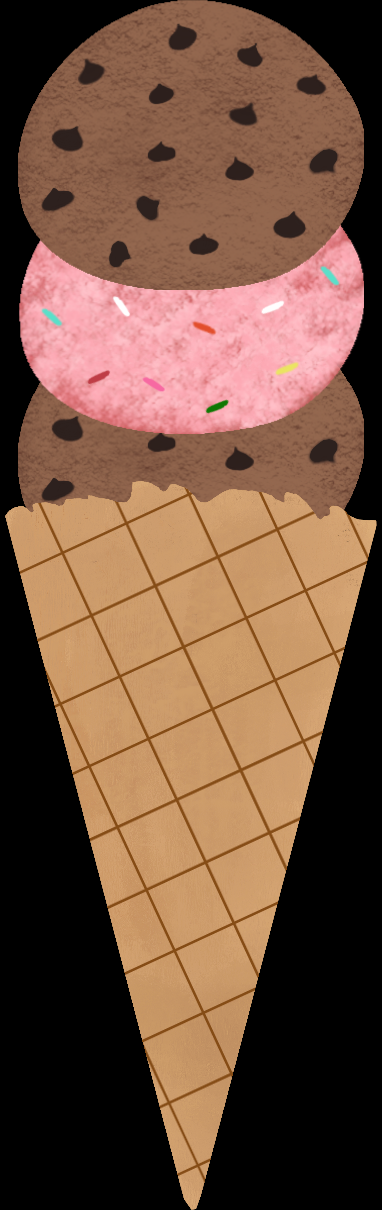


Taking the next order...

Order #2: 2 scoops in a CUP ↓
#. Flavor 	    	 Topping
1. Vanilla 	with	 a Cherry
2. Vanilla 	with	 Sprinkles


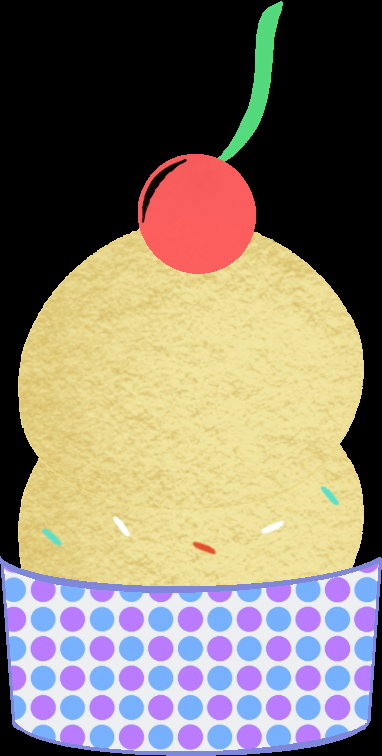

In [1]:
from IceCreamOrder import *

order = IceCreamOrder()
order.takeOrder()
order.printOrder()
#order.scoopImage()
order.getFinalOrder()
display(order.iceCreamOrder)
order.takeOrder()
order.printOrder()
#order.scoopImage()
order.getFinalOrder()
display(order.iceCreamOrder)

GUI for Ice Cream Parlor
---

In [ ]:
import sys
from PyQt6.QtWidgets import QApplication, QMainWindow, QPushButton
from PyQt6.QtGui import QPixmap
from PyQt6.QtCore import QLineF 

# Subclass QMainWindow to customize your application's main window
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("Ice Cream Parlor")
        
        button      = QPushButton(self)
        button.setGeometry(50, 50, 200, 100)

        # Replace 'path_to_image' with the path to your image file
        image_path  = 'path_to_image'
        pixmap      = QPixmap(image_path)

        if pixmap.isNull():
            print("Error loading image")
        else:
            button.setIcon(pixmap)
            button.setIconSize(pixmap.size())
        
        # Set the central widget of the Window
        self.setCentralWidget(self.button)
        
    def the_button_was_released(self):
        self.button_is_checked = self.button.isChecked()
        print(self.button_is_checked)

app     = QApplication(sys.argv)

window  = MainWindow()
window.show()

app.exec()

Obtain the image for each ice cream scoop
---

In [ ]:
from PIL import Image
# Test with these
#Flavors    ["Vanilla", "Chocolate", "Strawberry"]
#Toppings   ["Sprinkles", "Chocolate Chips", "Cherry", "No Topping"]

layer1 = Image.open('Strawberry.png')
layer2 = Image.open('Chocolate Chips.png')

#Compositing image using Image.alpha_composite
final2 = Image.new("RGBA", layer1.size)
final2 = Image.alpha_composite(final2, layer1)
final2 = Image.alpha_composite(final2, layer2)
final2.save("scoop1.png", format="png")
final2.show()


Getting the image of the scoops of ice cream
---

In [ ]:
from PIL import Image
from IceCreamOrder import *

#order = IceCreamOrder()
#order.takeOrder()
#order.printOrder()
#order.scoopImage()

#Flavors    ["Vanilla", "Chocolate", "Strawberry"]

from PIL import Image
# Front Image 
bottomFileName = 'testOrder.png'
# Back Image 
toPasteFileName = 'Vanilla.png'

# Open Front Image 
addToStack = Image.open(toPasteFileName) 
# Open Background Image 
iceCreamScoops = Image.open(bottomFileName) 
# Convert image to RGBA 
addToStack = addToStack.convert("RGBA") 
# Convert image to RGBA 
iceCreamScoops = iceCreamScoops.convert("RGBA") 
# Calculate width to be at the center 
width = 0
# Calculate height to be at the center 
height = (addToStack.height)// 2
dst = Image.new('RGB', (iceCreamScoops.width, iceCreamScoops.height + height))
# Paste the frontImage at (width, height)
dst.paste(iceCreamScoops, (0, dst.height-iceCreamScoops.height), iceCreamScoops) 
dst.paste(addToStack,(width,0), addToStack)
# Save this image 
dst.save("testOrder.png", format="png")
display(dst)

Add Cherry
---

In [ ]:
from PIL import Image
from IceCreamOrder import *

#order = IceCreamOrder()
#order.takeOrder()
#order.printOrder()
#order.scoopImage()

#Flavors    ["Vanilla", "Chocolate", "Strawberry"]

from PIL import Image
# Front Image 
bottomFileName = 'testOrder.png'
# Back Image 
toPasteFileName = 'Cherry.png'

# Open Front Image 
addToStack = Image.open(toPasteFileName) 
#Open Background Image 
iceCreamScoops = Image.open(bottomFileName) 
#Convert image to RGBA 
addToStack = addToStack.convert("RGBA") 
#Convert image to RGBA 
iceCreamScoops = iceCreamScoops.convert("RGBA") 
#Calculate width to be at the center 
#Had to adjust since the stem of the cherry moves it over some
width = (iceCreamScoops.width - addToStack.width) // 2 + 20
#Calculate height of cherry 
height = addToStack.height-iceCreamScoops.height // 8
dst = Image.new('RGB', (iceCreamScoops.width, iceCreamScoops.height + height))
#Paste the ice cream scoops
dst.paste(iceCreamScoops, (0, dst.height-iceCreamScoops.height), iceCreamScoops)
#Paste the cherry 
dst.paste(addToStack,(width,0), addToStack)
# Save this image 
dst.save("testCherry.png", format="png")
display(dst)

Create a new image with the ice cream scoop(s) in the container
---

In [ ]:
from PIL import Image
from IceCreamOrder import *

#order = IceCreamOrder()
#order.takeOrder()
#order.printOrder()
#order.scoopImage()

#Flavors    ["Vanilla", "Chocolate", "Strawberry"]
#["Waffle Cone", "Cake Cone", "Cup"]
from PIL import Image
# Front Image 
bottomFileName = 'Cup.png'
# Back Image 
toPasteFileName = 'testCherry.png'

# Open Front Image 
addToStack = Image.open(toPasteFileName) 
# Open Background Image 
iceCreamScoops = Image.open(bottomFileName) 
# Convert image to RGBA 
addToStack = addToStack.convert("RGBA") 
# Convert image to RGBA 
iceCreamScoops = iceCreamScoops.convert("RGBA") 


# Calculate width to be at the center 
width = (iceCreamScoops.width - addToStack.width) // 2
# Calculate height to be at the center 
height = addToStack.height-100
dst = Image.new('RGB', (iceCreamScoops.width, iceCreamScoops.height + height))
# Paste the frontImage at (width, height) 
dst.paste(addToStack,(width,0), addToStack)
dst.paste(iceCreamScoops, (0, dst.height-iceCreamScoops.height), iceCreamScoops) 
# Save this image 
dst.save("testFinal.png", format="png")
display(dst)